# Contacts analysis

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import MDAnalysis as mda

### Initialization

In [67]:
# MACROs

n_active = 7
contact_dist = 1.33

In [4]:
u = mda.Universe("activeCK1d_SER_start.gsd", "activeCK1d_SER_sim1_dump.dcd")
ag = u.atoms
n_atoms = len(ag)
n_steps = len(u.trajectory)

n_ser = n_atoms-n_active

print(n_steps, n_atoms)
print(ag.positions)

1000000 31
[[ 6.1641     8.7069     4.7288   ]
 [ 4.9266     8.5788     4.2147   ]
 [ 3.6913    10.4997     1.3659   ]
 [ 7.8476    11.5389     1.8591   ]
 [ 6.0931    10.816      3.8959   ]
 [ 4.6078    10.3927     6.0366   ]
 [ 4.8056    10.1545     6.271    ]
 [ 3.8092    10.6693     8.2078   ]
 [ 3.1231    11.8534     8.589    ]
 [ 3.6203    12.7951     8.59     ]
 [ 8.9924    10.9738     9.7174   ]
 [ 9.4304     9.6519     9.8643   ]
 [ 9.7069     9.0196     9.8133   ]
 [ 9.8556     8.3431     9.6635   ]
 [ 9.8608     7.6308     9.5241   ]
 [ 9.9343     5.604      7.7719   ]
 [ 9.9534     5.2112     7.2206   ]
 [ 9.7854     4.4407     6.0902   ]
 [ 9.4335     4.144      5.5792   ]
 [ 7.0136     3.4132     4.4422   ]
 [ 6.6863     3.4098     4.4281   ]
 [ 5.7063     3.7243     4.3623   ]
 [ 5.1192     4.0953     4.3649   ]
 [ 4.8431     4.3737     4.3553   ]
 [-3.2123     2.0080001  3.3926   ]
 [-3.0011     3.0841     2.9758   ]
 [-3.0272002  2.3416     2.6188   ]
 [-2.769      2.6

### Comupting distances 

In [5]:
def compute_activeCK1d_pos(positions):
    active_pos = np.array( [ np.sum(positions[-n_active:,i])/7. for i in range(3)] )
    return active_pos

In [6]:
def compute_distances(active_pos, ser_pos):
    n_ser = len(ser_pos)
    dist = np.array(ser_pos)
    dist = dist - active_pos
    dist =  np.array( [ np.sqrt( (dist[i]**2).sum() ) for i in range(n_ser) ] ) 
    return dist

In [11]:
dist = []
for ts in u.trajectory:
    pos = ag.positions
    active_pos = compute_activeCK1d_pos(pos)
    dist.append(compute_distances(active_pos, pos[:-n_active]))

In [36]:
dist = np.array(dist)

In [58]:
print(len(dist))
print(len(dist[0]))

1000000
24


In [66]:
active_types = ag.types[-n_active:]
print(active_types)
active_residues_pos = ag.positions[-n_active:]
active_center_pos = compute_activeCK1d_pos(active_residues_pos)

dist_active = compute_distances(active_center_pos, active_residues_pos)
print(dist_active)

['SER' 'GLU' 'ASP' 'PHE' 'GLY' 'LEU' 'ALA']
[0.80438814 0.60572746 0.4402629  0.2703481  0.1182015  0.40636533
 0.5345246 ]


### Plotting

In [38]:
def plot_dist(dist, ser_id=0, start=0, end=None, jump=20):
    if end==None:
        end_tmp = len(dist)
    else:
        end_tmp = end
    
    time = np.arange(start, end_tmp, jump)*2
    
    plt.figure()
    plt.plot(time, dist[start:end_tmp:jump,ser_id])
    plt.xlabel('t [ps]')
    plt.show()

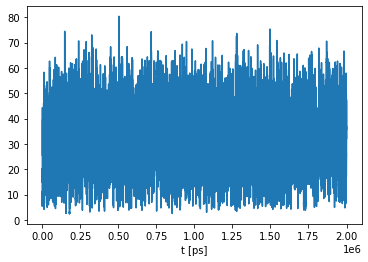

In [39]:
plot_dist(dist)

### Contacts

In [68]:
contacts = np.where(dist<contact_dist)
print(contacts)

(array([ 36489,  36490, 156806, 156807, 156808, 156809, 156809, 156810,
       156810, 378667, 427360, 427361, 427362, 427363, 427364, 427365,
       427366, 530683, 530684, 920556, 920556, 920556, 920557, 920557,
       920558, 920558, 920558, 920559, 920559, 920560, 920560, 920561,
       920561, 920562, 920563, 920563, 920564, 920564, 920565, 920565,
       920566, 920566, 920567, 920567, 920568, 920569, 920570, 920570,
       920572, 920572]), array([ 2,  2,  5,  5,  6,  5,  6,  5,  6,  3,  1,  1,  1,  1,  1,  1,  1,
        0,  0, 15, 16, 17, 15, 16, 15, 16, 17, 16, 17, 16, 17, 16, 17, 16,
       15, 16, 15, 16, 15, 16, 15, 16, 15, 16, 15, 16, 15, 16, 22, 23]))


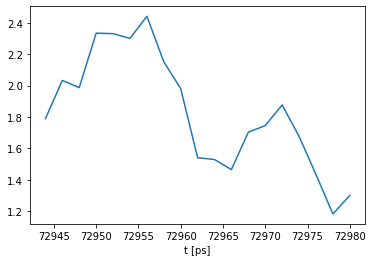

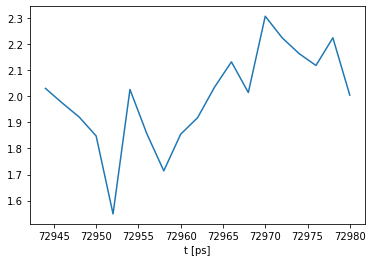

In [47]:
plot_dist(dist, 2, 36472, 36491, 1)
plot_dist(dist, 3, 36472, 36491, 1)

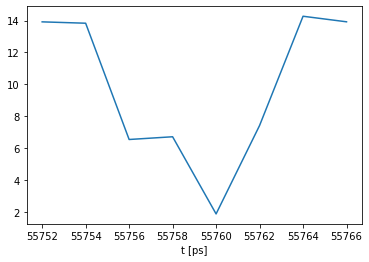

In [52]:
plot_dist(dist, 9, 27876, 27884, 1)

In [56]:
contacts = np.where(dist<1.0)
print(contacts)
print(dist[contacts])

(array([156809, 156809, 156810, 156810, 378667, 920556, 920556, 920557,
       920558, 920558, 920559, 920563, 920564, 920565]), array([ 5,  6,  5,  6,  3, 15, 16, 16, 15, 16, 16, 16, 15, 15]))
[0.89721018 0.96842014 0.99327425 0.85345853 0.36215887 0.94291115
 0.40265359 0.46899534 0.92216532 0.91264723 0.9733743  0.873223
 0.99400718 0.99683296]
